In [14]:
import pandas as pd
import numpy as np
from haversine import haversine
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/most_dangerous_geop.csv', index_col=0)
data.head()

,latitude,longitude
index,,
0,19.38626,-99.13730
1,19.32905,-99.28503
2,19.19540,-99.01944
3,19.22394,-99.20221
4,19.36427,-99.21133


In [16]:
K = 5
iterations_limit = 100
convergence_criteria = 0.5

In [4]:
latitude_min = np.min(data['latitude'])
latitude_max = np.max(data['latitude'])
longitude_min = np.min(data['longitude'])
longitude_max = np.max(data['longitude'])

latitude_min = int(latitude_min*100000)
latitude_max = int(latitude_max*100000)
longitude_min = int(longitude_min*100000)
longitude_max = int(longitude_max*100000)

In [5]:
print(longitude_min, longitude_max)

-9935350 -9894764


In [6]:
np.random.seed(1500)

In [30]:
# mu -> centroids
centroids = []

for i in range(0,K):
    lat = np.random.randint(latitude_min, latitude_max)
    lon = np.random.randint(longitude_min, longitude_max)
    
    centroids.append([lat, lon])

centroids = np.array(centroids)/100000

In [24]:
centroids

array([[ 19.26413, -99.25   ],
       [ 19.33443, -99.09284],
       [ 19.25095, -99.1079 ],
       [ 19.36729, -99.14371],
       [ 19.30073, -98.9676 ]])

In [25]:
# N is the observations number
N = data.shape[0]
# r is the casification matrix, initialized with zeros
r = np.zeros(N*K).reshape(N, K)

In [31]:
plot_counter = 0
J_plot = []
break_counter = 0

for i in range(0, iterations_limit):
    J = 0 # initalizing distorsion measure
    
    for n in range(N):
        x = np.array(data.iloc[n,0:2])
        mins = [haversine(x, centroids[k]) for k in range(K)]
        
        k_r = np.argmin(np.array(mins)) # Nearest cluster to x
        r[n, k_r] = 1 # Setting the nearest cluster to x in the r matrix
   
    # Calculating distorsion measure
    for n in range(N):
        for k in range(K):
            distance = haversine(x, centroids[k])
            J += r[n,k]*(distance**2)
    J_plot.append(J)
    
    # Updating centroids by k-means algorithm
    for k in range(K):
        c1, c2 = 0, 0
        for n in range(N):
            x = np.array(data.iloc[n,0:2])
            c1 += r[n,k]*x
            c2 += r[n,k]
            centroids[k] = c1/c2
            
    #print(J)
    if i > 1 and abs(J-J_prev) < convergence_criteria:
        break_counter +=1
        if break_counter > 3:
            break
    
    J_prev = J
    plot_counter += 1
    # reinitializing the matrix
    r = np.zeros(N*K).reshape(N, K)

<ipython-input-31-4de39c28c845>:29: RuntimeWarning: invalid value encountered in true_divide
  centroids[k] = c1/c2


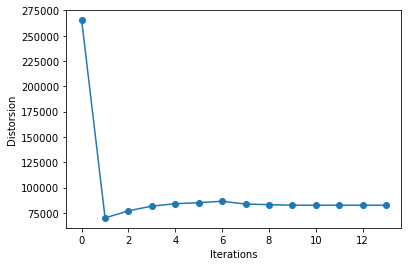

In [32]:
plt.plot(J_plot, linestyle='-', marker='o')
plt.ylabel('Distorsion')
plt.xlabel('Iterations')
#plt.xlim([-1,101])
#plt.ylim([82000, 83000])
plt.show()

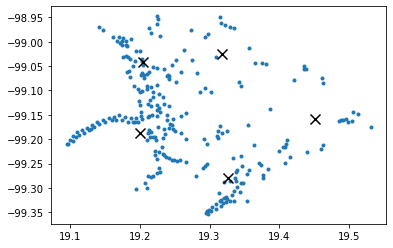

In [44]:
centroids = pd.DataFrame(centroids)

plt.scatter(data['latitude'], data['longitude'], marker='.')
plt.scatter(centroids[0], centroids[1], s=100, marker='x', color='black')
plt.show()

In [55]:
r_new = [np.argmax(row)+1 for row in r]
data['cluster'] = r_new 

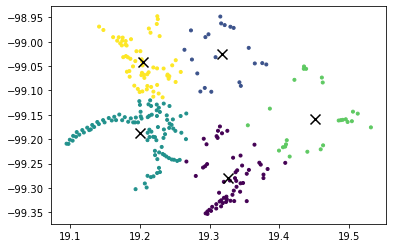

In [56]:
plt.scatter(data['latitude'], data['longitude'], c=data['cluster'] , marker='.')
plt.scatter(centroids[0], centroids[1], s=100, marker='x', color='black')
plt.show()

In [50]:
full_data = pd.read_csv('data/incidentes-viales-c5-limpio.csv', sep='$', index_col=0)

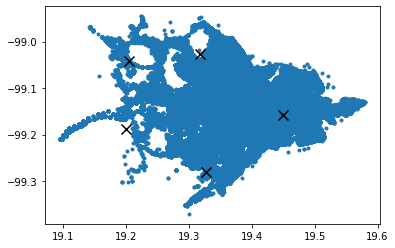

In [52]:
plt.scatter(full_data['latitud'], full_data['longitud'], marker='.')
plt.scatter(centroids[0], centroids[1], s=100, marker='x', color='black')
plt.show()

In [57]:
full_N = full_data.shape[0]
full_r = np.zeros(full_N*K).reshape(full_N, K)

In [70]:
c = np.array(centroids.iloc[:,0:2])
for n in range(full_N):
    x = np.array(full_data.iloc[n,4:6])
    mins = [haversine(x, c[k]) for k in range(K)]
    
    k_r = np.argmin(np.array(mins)) # Nearest cluster to x
    full_r[n, k_r] = 1 # Setting the nearest cluster to x in the r matrix

In [71]:
plt.scatter(full_data['latitud'], full_data['longitud'], c=full_data['cluster'] ,marker='.')
plt.scatter(centroids[0], centroids[1], s=100, marker='o', color='black')
plt.show()

KeyError: 'cluster'